In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist

In [3]:
(train_features, trian_labels), (test_features, test_labels) = mnist.load_data()

In [4]:
train_features.shape

(60000, 28, 28)

In [5]:
test_features.shape

(10000, 28, 28)

5


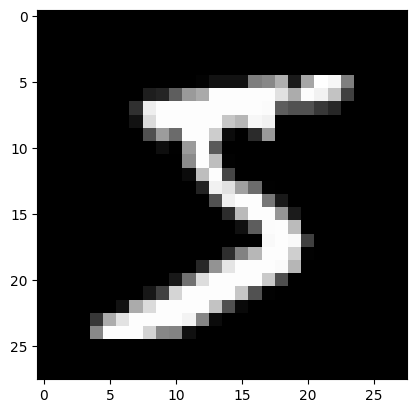

In [6]:
img = train_features[0]
print(trian_labels[0])

plt.gray()
plt.imshow(img)

# Preprocessing

In [7]:
np.min(img), np.max(img)

(np.uint8(0), np.uint8(255))

In [8]:
train_features = train_features/255.0
test_features = test_features/255.0

# Model Definition

In [9]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])

In [11]:
model.build(input_shape=(None, 28, 28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist = model.fit(train_features, trian_labels, epochs=100, batch_size=256, validation_data=(test_features, test_labels))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7954 - loss: 0.7307 - val_accuracy: 0.9425 - val_loss: 0.1918
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9514 - loss: 0.1690 - val_accuracy: 0.9637 - val_loss: 0.1243
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.1120 - val_accuracy: 0.9641 - val_loss: 0.1175
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0839 - val_accuracy: 0.9732 - val_loss: 0.0867
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0684 - val_accuracy: 0.9749 - val_loss: 0.0815
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0519 - val_accuracy: 0.9760 - val_loss: 0.0783
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0419 - val_accuracy: 0.9767 - val_loss: 0.0761
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0340 - val_acc

In [13]:
model.evaluate(test_features, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.1516


[0.12523464858531952, 0.9807000160217285]

6


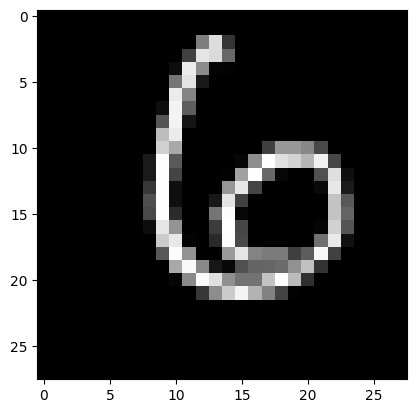

In [14]:
idx = 100
img = test_features[idx]
print(test_labels[idx])
plt.gray()
plt.imshow(img)

In [21]:
test_data = np.reshape(img, (-1, 28, 28))
test_data.shape

(1, 28, 28)

In [22]:
model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


array([[6.5448402e-12, 2.2074069e-19, 5.1146923e-17, 2.0057866e-17,
        1.0494307e-16, 1.6109190e-11, 1.0000000e+00, 5.5775380e-20,
        1.4244008e-13, 8.0457214e-22]], dtype=float32)

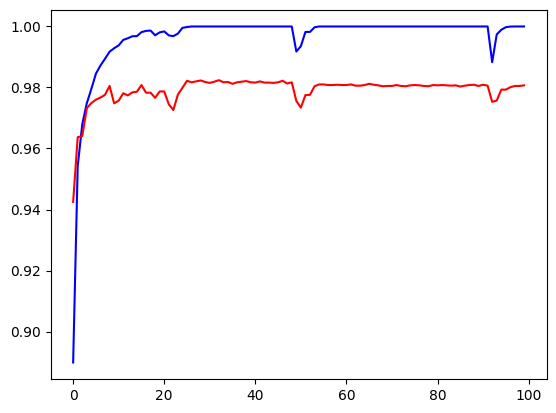

In [23]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')